In [2]:
import numpy as np
import pandas as pd
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from src.exception import CustomException
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../artifacts/data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [5]:
df.shape

(375, 6)

In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [8]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [9]:
df.nunique

<bound method DataFrame.nunique of       Age  Gender Education Level                      Job Title  \
0    32.0    Male      Bachelor's              Software Engineer   
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
0                    5.0   90000.0  
1                    3.0   65000.0  
2                   15.0  150000.0  


In [10]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [11]:
def categorize_job_title(job_title):
    job_title = str(job_title).lower()
    if "software" in job_title or "developer" in job_title:
        return 'Software/Developer'
    elif "data" in job_title or 'analyst' in job_title or 'scientist' in job_title:
        return 'Data Analyst/Scientist'
    elif "sales" in job_title or "reprentative" in job_title:
        return 'Sales'
    elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
        return 'Manager/Director/vp'
    elif 'marketing' in job_title or 'social media' in job_title:
        return 'Marketing/Social Media'
    elif 'product' in job_title or 'designer' in job_title:
        return 'Product/Designer'
    elif 'hr' in job_title or 'human resource' in job_title:
        return 'HR/Human Resource'
    elif 'financial' in job_title or 'accountant' in job_title:
        return 'Financial/Accountant'
    elif 'project manager' in job_title:
        return 'Project Manager'
    elif 'it' in job_title or 'support' in job_title:
        return 'IT/Technical Support'
    elif 'operations' in job_title or 'supply chain' in job_title:
        return  'Operations/Supply Chain'
    elif 'customer service' in job_title or 'receptionalist' in job_title:
        return 'Customer Service/Receptionalist'
    else:
        return "Other"

In [12]:
df['Job Title'] = df['Job Title'].apply(categorize_job_title)

In [13]:
df['Job Title']

0           Software/Developer
1       Data Analyst/Scientist
2          Manager/Director/vp
3                        Sales
4          Manager/Director/vp
                ...           
370     Data Analyst/Scientist
371        Manager/Director/vp
372        Manager/Director/vp
373    Operations/Supply Chain
374     Data Analyst/Scientist
Name: Job Title, Length: 373, dtype: object

In [14]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

In [15]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [16]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software/Developer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst/Scientist,3.0,65000.0
2,45.0,Male,PhD,Manager/Director/vp,15.0,150000.0
3,36.0,Female,Bachelor's,Sales,7.0,60000.0
4,52.0,Male,Master's,Manager/Director/vp,20.0,200000.0


In [17]:
df['Job Title'].unique()

array(['Software/Developer', 'Data Analyst/Scientist',
       'Manager/Director/vp', 'Sales', 'Marketing/Social Media',
       'Customer Service/Receptionalist', 'Other', 'IT/Technical Support',
       'Product/Designer', 'Financial/Accountant', 'HR/Human Resource',
       'Operations/Supply Chain'], dtype=object)

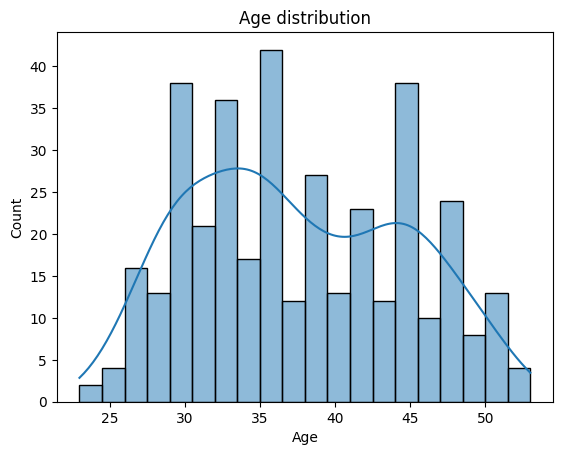

In [18]:
sns.histplot(data=df,x='Age',bins=20,kde=True)
plt.title('Age distribution')
plt.show()

(array([0, 1, 2]),
 [Text(0, 0, "Bachelor's"), Text(1, 0, "Master's"), Text(2, 0, 'PhD')])

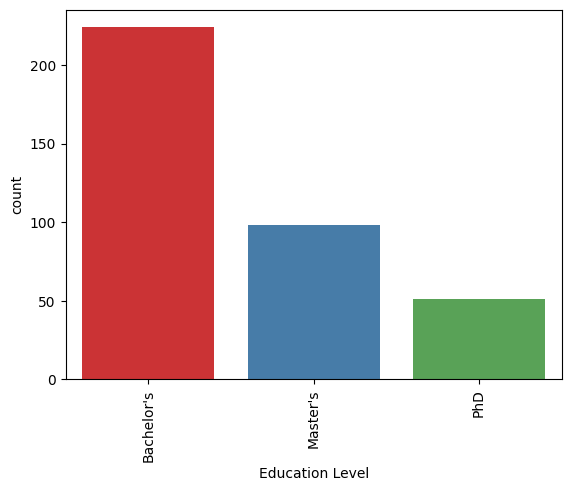

In [19]:
sns.countplot(x='Education Level',data=df,palette='Set1')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Scientist'),
  Text(2, 0, 'Manager/Director/vp'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service/Receptionalist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'HR/Human Resource'),
  Text(11, 0, 'Operations/Supply Chain')])

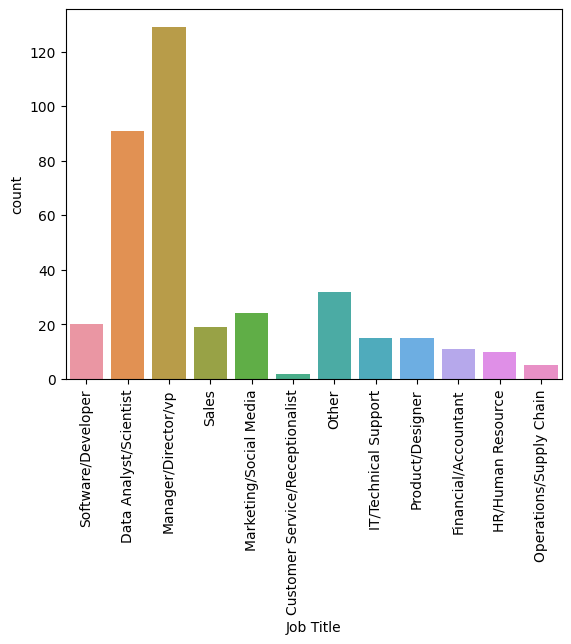

In [20]:
sns.countplot(x='Job Title',data=df)
plt.xticks(rotation=90)

In [21]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

<Axes: xlabel='Years of Experience', ylabel='Count'>

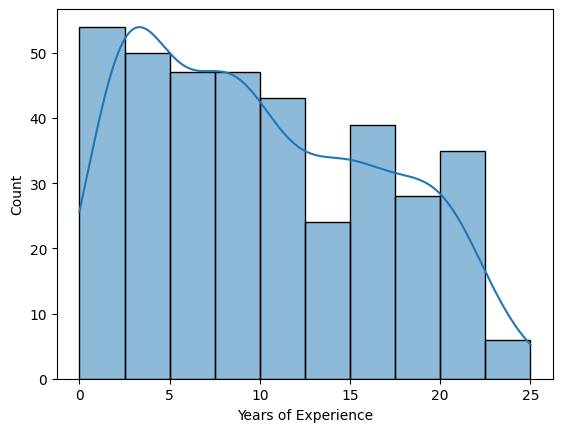

In [22]:
sns.histplot(x='Years of Experience',data=df,kde=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Scientist'),
  Text(2, 0, 'Manager/Director/vp'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service/Receptionalist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'HR/Human Resource'),
  Text(11, 0, 'Operations/Supply Chain')])

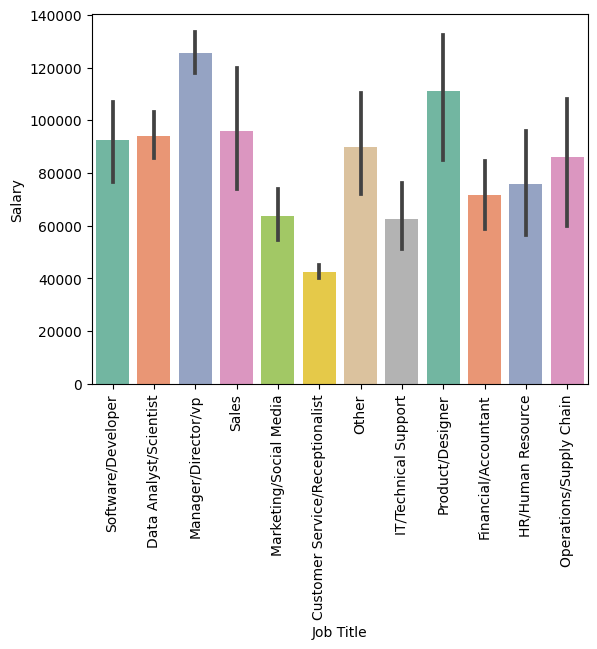

In [23]:
sns.barplot(x='Job Title', y='Salary',data=df,palette='Set2')
plt.xticks(rotation=90)

In [24]:
from sklearn.preprocessing import LabelEncoder
features = ['Gender','Education Level','Job Title']
le = LabelEncoder()
for feature in features:
    le.fit(df[feature].unique())
    df[feature] = le.transform(df[feature])
    print(feature,df[feature].unique())

Gender [1 0]
Education Level [0 1 2]
Job Title [11  1  5 10  6  0  8  4  9  2  3  7]


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['Age','Years of Experience']] = sc.fit_transform(df[['Age','Years of Experience']])

In [26]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,-0.769398,1,0,11,-0.768276,90000.0
1,-1.336003,0,1,1,-1.073702,65000.0
2,1.072068,1,2,5,0.758859,150000.0
3,-0.202793,0,0,10,-0.462849,60000.0
4,2.063627,1,1,5,1.522426,200000.0


<Axes: >

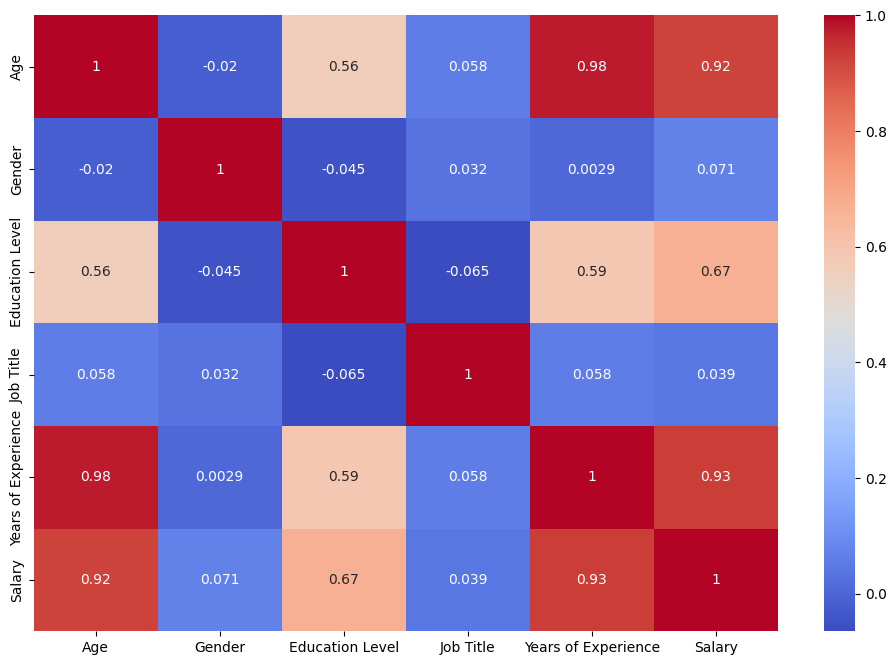

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Salary',axis=1),df['Salary'],test_size=0.2,random_state=42)


In [31]:
from sklearn.ensemble import RandomForestRegressor
rm = RandomForestRegressor()

In [33]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': range(1,100),
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8], 
}

grid_search = GridSearchCV(rm,parameters,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 31}


In [34]:
rm = RandomForestRegressor(max_depth=10,min_samples_leaf=2,n_estimators=31)
rm.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=31)

In [35]:
y_pred = rm.predict(X_test)

In [36]:
y_pred

array([175862.71121352, 115129.92831541, 128275.7296467 ,  92917.64418377,
       162462.74961598, 160903.10361681, 142831.41321045, 103297.04301075,
        52325.2688172 ,  89426.07526882, 135509.21658986, 146817.20430108,
        42288.14644137,  94282.25806452, 128262.67281106,  52325.2688172 ,
        55983.87096774,  37270.09600614,  87319.89247312,  98134.02457757,
       109311.44393241, 104079.87711214, 158012.28878648,  59852.7905786 ,
        92917.64418377,  54600.42242704, 154807.79569892,  39758.06451613,
       100723.50230415, 160940.66820276,  47807.21966206, 111967.74193548,
        47424.7311828 , 149233.87096774,  97034.1781874 ,  36070.28801843,
       161088.70967742,  40413.97849462, 153764.78494624,  57984.25499232,
        40268.8172043 ,  97961.21351767, 153381.72043011, 178282.74682307,
        40037.6344086 , 163477.028348  , 110375.96006144,  42456.34920635,
        38680.64516129,  40080.64516129, 158161.48233487,  87064.64413722,
       128166.66666667,  

In [39]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
329,180000.0,175862.711214
33,65000.0,115129.928315
15,125000.0,128275.729647
316,80000.0,92917.644184
57,140000.0,162462.749616
...,...,...
94,75000.0,79825.652842
196,90000.0,104596.390169
313,60000.0,60111.815156
294,140000.0,136903.993856


In [40]:
rm.score(X_train,y_train)

0.9628979524256143